In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
path = 'C:/Users/seven/OneDrive/바탕 화면/Python Workspace/금융데이터경진대회/KRX 데이터/전종목 등락률/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]
file_list_py

df = pd.DataFrame()
Timeindex = pd.date_range('9/1/2018', periods= len(file_list_py), freq = 'M')
for i, time in zip(file_list_py,Timeindex):
    data = pd.read_csv(path + i, encoding= 'cp949')
    data_df = pd.DataFrame(data)
    data_df['기준년월'] = time
    df = pd.concat([df, data])
 
df_UD = df.reset_index(drop=True)

In [4]:
path = 'C:/Users/seven/OneDrive/바탕 화면/Python Workspace/금융데이터경진대회/KRX 데이터/투자자별 순매수 (기관합계)/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]

df = pd.DataFrame()
Timeindex = pd.date_range('9/1/2018', periods= len(file_list_py), freq = 'M')
for i, time in zip(file_list_py,Timeindex):
    data = pd.read_csv(path + i, encoding= 'cp949')
    data_df = pd.DataFrame(data)
    data_df['기준년월'] = time
    df = pd.concat([df, data])
    
df_CO = df.reset_index(drop=True)

In [5]:
path = 'C:/Users/seven/OneDrive/바탕 화면/Python Workspace/금융데이터경진대회/KRX 데이터/투자자별 순매수(개인)/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]

df = pd.DataFrame()
Timeindex = pd.date_range('9/1/2018', periods= len(file_list_py), freq = 'M')
for i, time in zip(file_list_py,Timeindex):
    data = pd.read_csv(path + i, encoding= 'cp949')
    data_df = pd.DataFrame(data)
    data_df['기준년월'] = time
    df = pd.concat([df, data])
 
df_INDI = df.reset_index(drop=True)

In [6]:
path = 'C:/Users/seven/OneDrive/바탕 화면/Python Workspace/금융데이터경진대회/KRX 데이터/투자자별 순매수(외국인)/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]

df = pd.DataFrame()
Timeindex = pd.date_range('9/1/2018', periods= len(file_list_py), freq = 'M')
for i, time in zip(file_list_py,Timeindex):
    data = pd.read_csv(path + i, encoding= 'cp949')
    data_df = pd.DataFrame(data)
    data_df['기준년월'] = time
    df = pd.concat([df, data])
 
df_FOR = df.reset_index(drop=True)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.DataFrame(index = Timeindex)
df.index.names = ['기준년월']

In [9]:
#관련 종목 추출 함수

def get_category(category, df):
    category_df = df[df['종목명'] == category]
    category_df = category_df[['종목명','시작일 기준가', '종료일 종가', '기준년월']]
    category_df.set_index('기준년월', inplace = True)
    return category_df

def get_plot_2(df, i, y):
    df_end = df[y]
    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    plt.plot(df_end, 'ko--')
    fig.autofmt_xdate(rotation = 45)
    ax.set_title(str(df['종목명'].unique()))
    plt.show()

In [10]:
#맷플롯립 한글 설정
import matplotlib.font_manager as fm
font_path = r'C:\Users\seven\OneDrive\바탕 화면\Python Workspace\네이버글꼴모음'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [11]:
import pandas as pd
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [12]:
###종합 지수 = (비교 시점일 구성종목 평균 주가/기준 시점일 구성종목 평균 주가)*100 ###

def get_all_time_index(category, month):
    xlsx = pd.ExcelFile('C:/Users/seven/OneDrive/바탕 화면/경진대회/관련종목.xlsx')
    inv_category = pd.read_excel(xlsx, sheet_name = category)
    category_list = inv_category['종목명'].tolist()

    category_df_list = []
    for i in range(len(category_list)):
        category_df_list.append(get_category(category_list[i], df_UD))

    S_df_list = []
    for S_list in category_df_list:
        S_df_list.append(pd.merge(df, S_list, on = '기준년월', how = 'left'))

    for df_list in S_df_list:
        df_list.fillna(0, inplace=True)

    price_9_1 = []
    for i in range(len(S_df_list)):
        price_9_1.append(S_df_list[i].iloc[0, 1])

    array = np.array(price_9_1)
    criteria_mean = array.mean()

    price = []
    for i in range(len(S_df_list)):
        price.append(S_df_list[i].iloc[month, 2])

    array2 = np.array(price)
    month_mean = array2.mean()

    all_time = (month_mean/criteria_mean)*100
    return all_time

def get_index_list(category):
    index_list = []
    for i in range(len(Timeindex)):
        index_list.append(get_all_time_index(category, i))
    df = pd.DataFrame(index_list, index = Timeindex, columns= ['종합지수'])
    return df 

In [13]:
index_df_j = get_index_list('전자')

In [14]:
data = pd.read_csv(r'C:\Users\seven\OneDrive\바탕 화면\경진대회\금융보안원_경진대회_데이터(최종제출).csv')

data['매출금액'] = data['매출금액']/10000
data.rename(columns={'매출금액' : '매출금액(단위:만원)'}, inplace=True)
#매출 건수 한 건당 매출금액 컬럼 추가
data['건당 매출금액(단위:만원)'] = data['매출금액(단위:만원)']/data['매출건수']

data_j = data[data['품목대분류명'] == '전자']

In [28]:
from datetime import datetime

<ipython-input-35-9e00aa7cc806>:4: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[0].set_xticks(Timeindex, str(Timeindex))


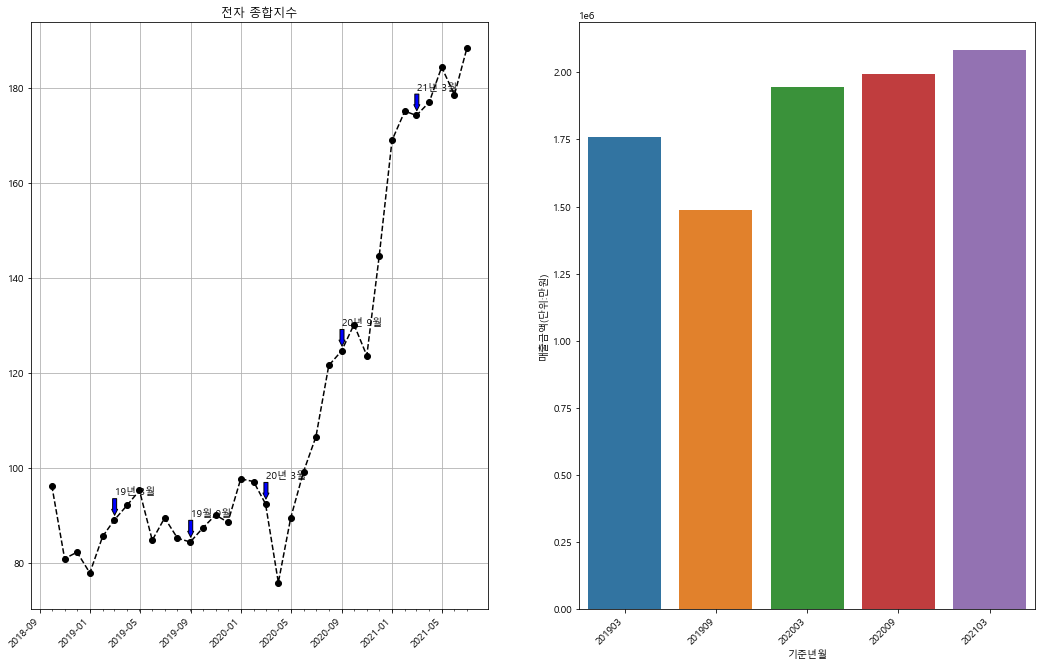

In [35]:
fig, ax = plt.subplots(figsize = (18,12), ncols= 2)
ax[0].plot(index_df_j['종합지수'], 'ko--')
ax[0].set_title('전자 종합지수')
ax[0].set_xticks(Timeindex, str(Timeindex))
ax[0].grid(True)
crisis_data = [
    (datetime(2019, 3, 1), '19년 3월'),
    (datetime(2019, 9, 1), '19월 9월'),
    (datetime(2020, 3, 1), '20년 3월'),
    (datetime(2020, 9, 1), '20년 9월'),
    (datetime(2021, 3, 1), '21년 3월')
]
spx = index_df_j['종합지수']
for date, label in crisis_data:
    ax[0].annotate(label, xy = (date, spx.asof(date) + 1), #annotate : x, y로 지정한 위치에 라벨을 추가
    xytext = (date, spx.asof(date) + 7),
    arrowprops = dict(facecolor = 'blue', headwidth = 6, width = 4, headlength = 6),
    horizontalalignment = 'left', verticalalignment = 'top')
fig.autofmt_xdate(rotation = 45)
groupby_e = data_j['매출금액(단위:만원)'].groupby(data_j['기준년월']).sum()
dff = pd.DataFrame(groupby_e)
dff.reset_index(inplace = True) 
sns.barplot(x='기준년월', y = '매출금액(단위:만원)',data=dff,ax=ax[1])
plt.show()

In [16]:
def get_category_2(category, df):
    category_df = df[df['종목명'] == category]
    category_df = category_df[['종목명','거래량_순매수', '거래대금_순매수', '기준년월']]
    category_df.set_index('기준년월', inplace = True)
    return category_df

In [17]:
def get_sum(category, month, df_s):
    xlsx = pd.ExcelFile('C:/Users/seven/OneDrive/바탕 화면/경진대회/관련종목.xlsx')
    inv_category = pd.read_excel(xlsx, sheet_name = category)
    category_list = inv_category['종목명'].tolist()

    df = pd.DataFrame(index = Timeindex)
    df.index.names = ['기준년월']

    category_df_list = []
    for i in range(len(category_list)):
        category_df_list.append(get_category_2(category_list[i], df_s))

    S_df_list = []
    for S_list in category_df_list:
        S_df_list.append(pd.merge(df, S_list, on = '기준년월', how = 'left'))

    for df_list in S_df_list:
        df_list.fillna(0, inplace=True)

    volume_list = []
    for volume in S_df_list:
        volume_list.append(volume.iloc[month,1])

    array = np.array(volume_list)
    n_sum = array.sum()

    return n_sum

def get_sum_list(category, df_s):
    index_list = []
    for i in range(len(Timeindex)):
        index_list.append(get_sum(category, i, df_s))
    df = pd.DataFrame(index_list, index = Timeindex, columns= ['종합지수'])
    return df 

In [18]:
indi_j = get_sum_list('전자', df_INDI)

<ipython-input-38-d0d856b1e0c6>:6: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[0].set_xticks(Timeindex, str(Timeindex))


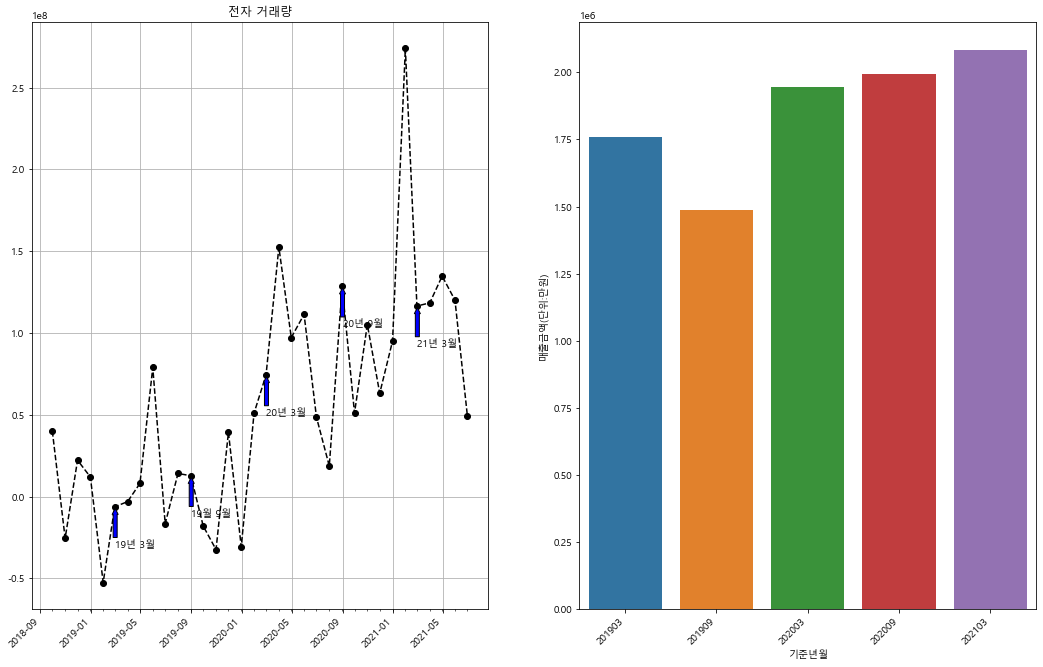

In [38]:
#개인
#indi_f = get_sum_list('식품', df_INDI)
fig, ax = plt.subplots(figsize = (18,12), ncols= 2)
ax[0].plot(indi_j['종합지수'], 'ko--')
ax[0].set_title('전자 거래량')
ax[0].set_xticks(Timeindex, str(Timeindex))
ax[0].grid(True)
crisis_data = [
    (datetime(2019, 3, 1), '19년 3월'),
    (datetime(2019, 9, 1), '19월 9월'),
    (datetime(2020, 3, 1), '20년 3월'),
    (datetime(2020, 9, 1), '20년 9월'),
    (datetime(2021, 3, 1), '21년 3월')
]
spx = indi_j['종합지수']
for date, label in crisis_data:
    ax[0].annotate(label, xy = (date, spx.asof(date) - 1000000), #annotate : x, y로 지정한 위치에 라벨을 추가
    xytext = (date, spx.asof(date) - 20000000),
    arrowprops = dict(facecolor = 'blue', headwidth = 6, width = 4, headlength = 6),
    horizontalalignment = 'left', verticalalignment = 'top')
fig.autofmt_xdate(rotation = 45)
fig.autofmt_xdate(rotation = 45)
groupby_f = data_j['매출금액(단위:만원)'].groupby(data_j['기준년월']).sum()
dff = pd.DataFrame(groupby_f)
dff.reset_index(inplace = True) 
sns.barplot(x='기준년월', y = '매출금액(단위:만원)',data=dff,ax=ax[1])
plt.show()

In [21]:
CO_f = get_sum_list('전자', df_CO)

<ipython-input-44-9db49386efac>:6: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[0].set_xticks(Timeindex, str(Timeindex))


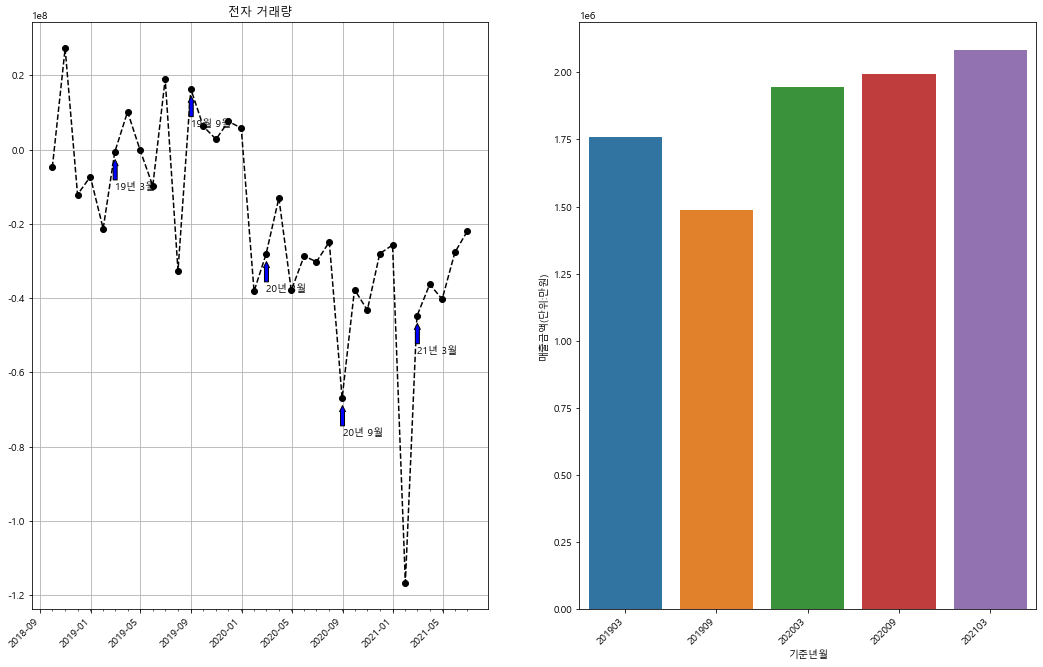

In [44]:
#기관

fig, ax = plt.subplots(figsize = (18,12), ncols= 2)
ax[0].plot(CO_f['종합지수'], 'ko--')
ax[0].set_title('전자 거래량')
ax[0].set_xticks(Timeindex, str(Timeindex))
ax[0].grid(True)
crisis_data = [
    (datetime(2019, 3, 1), '19년 3월'),
    (datetime(2019, 9, 1), '19월 9월'),
    (datetime(2020, 3, 1), '20년 3월'),
    (datetime(2020, 9, 1), '20년 9월'),
    (datetime(2021, 3, 1), '21년 3월')
]
spx = CO_f['종합지수']
for date, label in crisis_data:
    ax[0].annotate(label, xy = (date, spx.asof(date) - 2000000), #annotate : x, y로 지정한 위치에 라벨을 추가
    xytext = (date, spx.asof(date) - 8000000),
    arrowprops = dict(facecolor = 'blue', headwidth = 6, width = 4, headlength = 6),
    horizontalalignment = 'left', verticalalignment = 'top')
fig.autofmt_xdate(rotation = 45)
fig.autofmt_xdate(rotation = 45)
groupby_f = data_j['매출금액(단위:만원)'].groupby(data_j['기준년월']).sum()
dff = pd.DataFrame(groupby_f)
dff.reset_index(inplace = True) 
sns.barplot(x='기준년월', y = '매출금액(단위:만원)',data=dff,ax=ax[1])
plt.show()

In [24]:
FOR_f = get_sum_list('전자', df_FOR)

<ipython-input-47-2a37c010b9c4>:6: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[0].set_xticks(Timeindex, str(Timeindex))


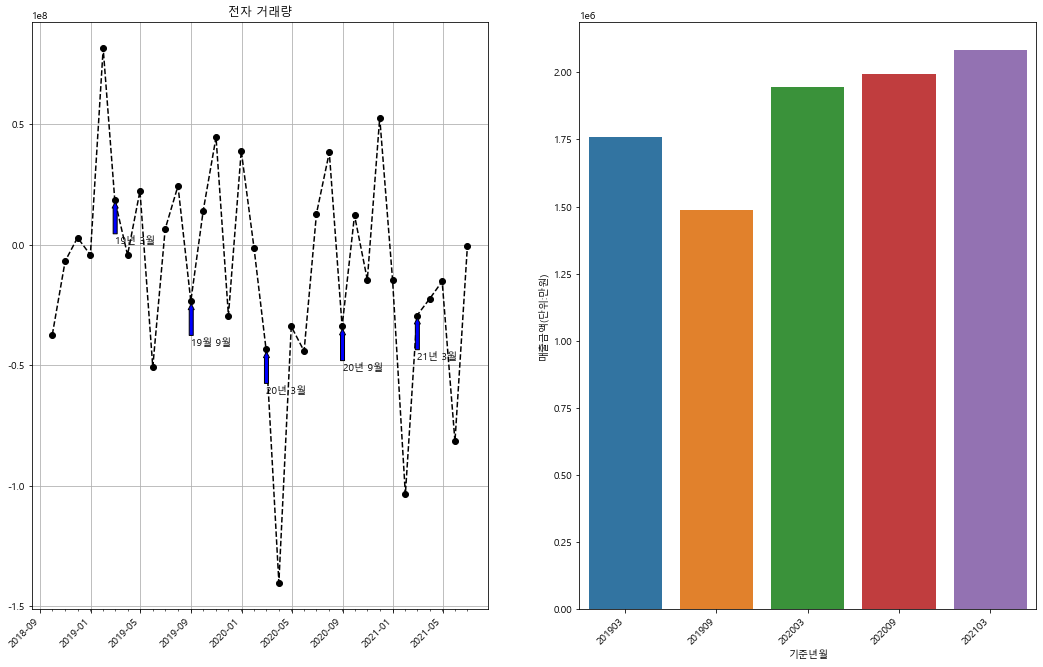

In [47]:
#외국인

fig, ax = plt.subplots(figsize = (18,12), ncols= 2)
ax[0].plot(FOR_f['종합지수'], 'ko--')
ax[0].set_title('전자 거래량')
ax[0].set_xticks(Timeindex, str(Timeindex))
ax[0].grid(True)
crisis_data = [
    (datetime(2019, 3, 1), '19년 3월'),
    (datetime(2019, 9, 1), '19월 9월'),
    (datetime(2020, 3, 1), '20년 3월'),
    (datetime(2020, 9, 1), '20년 9월'),
    (datetime(2021, 3, 1), '21년 3월')
]
spx = FOR_f['종합지수']
for date, label in crisis_data:
    ax[0].annotate(label, xy = (date, spx.asof(date) - 1000000), #annotate : x, y로 지정한 위치에 라벨을 추가
    xytext = (date, spx.asof(date) - 15000000),
    arrowprops = dict(facecolor = 'blue', headwidth = 6, width = 4, headlength = 6),
    horizontalalignment = 'left', verticalalignment = 'top')
fig.autofmt_xdate(rotation = 45)
fig.autofmt_xdate(rotation = 45)
groupby_f = data_j['매출금액(단위:만원)'].groupby(data_j['기준년월']).sum()
dff = pd.DataFrame(groupby_f)
dff.reset_index(inplace = True) 
sns.barplot(x='기준년월', y = '매출금액(단위:만원)',data=dff,ax=ax[1])
plt.show()